In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set a theme (style + color palette)
sns.set_theme(style='darkgrid', palette='deep')

print('Seaborn version:', sns.__version__)

Seaborn version: 0.13.2


In [5]:
# Load the 'tips' dataset
tips = sns.load_dataset('tips')

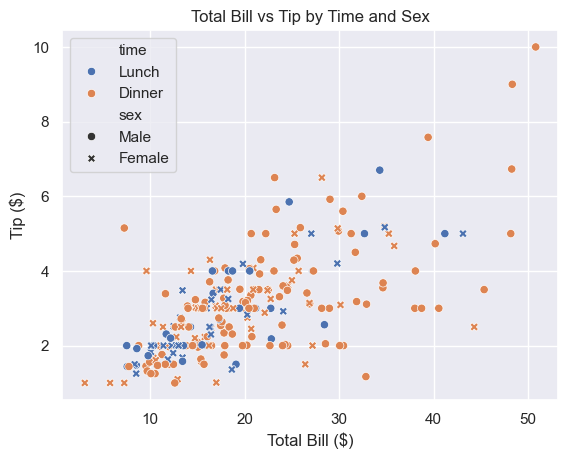

In [ ]:

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='sex')
# sns.lmplot(data=tips, x='total_bill', y='tip', hue='time', scatter=False, legend=False)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip by Time and Sex')

plt.show()

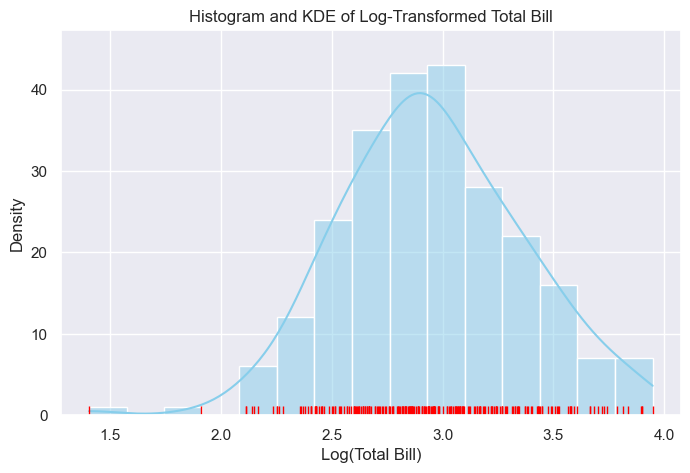

The log-transformed total_bill distribution is more symmetric than the original, which is right-skewed. The log transformation reduces the skew by compressing larger values, making the distribution closer to normal.


In [20]:

log_total_bill = np.log1p(tips['total_bill'])
plt.figure(figsize=(8, 5))

sns.histplot(log_total_bill, kde=True, color='skyblue')

sns.rugplot(log_total_bill, color='red')

plt.xlabel('Log(Total Bill)')
plt.ylabel('Density')
plt.title('Histogram and KDE of Log-Transformed Total Bill')

plt.show()

# Assess symmetry
print("The log-transformed total_bill distribution is more symmetric than the original, which is right-skewed. The log transformation reduces the skew by compressing larger values, making the distribution closer to normal.")

/tmp/ipykernel_37756/2983991510.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()


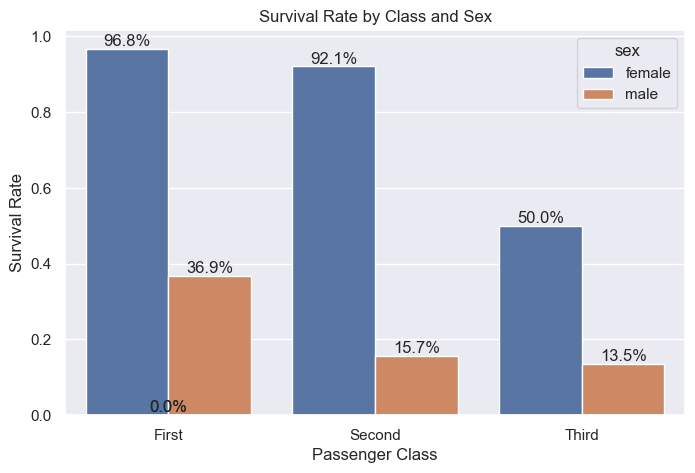

In [ ]:
titanic = sns.load_dataset('titanic')

survival_rates = titanic.groupby(['class', 'sex'])['survived'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=survival_rates, x='class', y='survived', hue='sex')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')

# Set labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class and Sex')

# Show plot
plt.show()

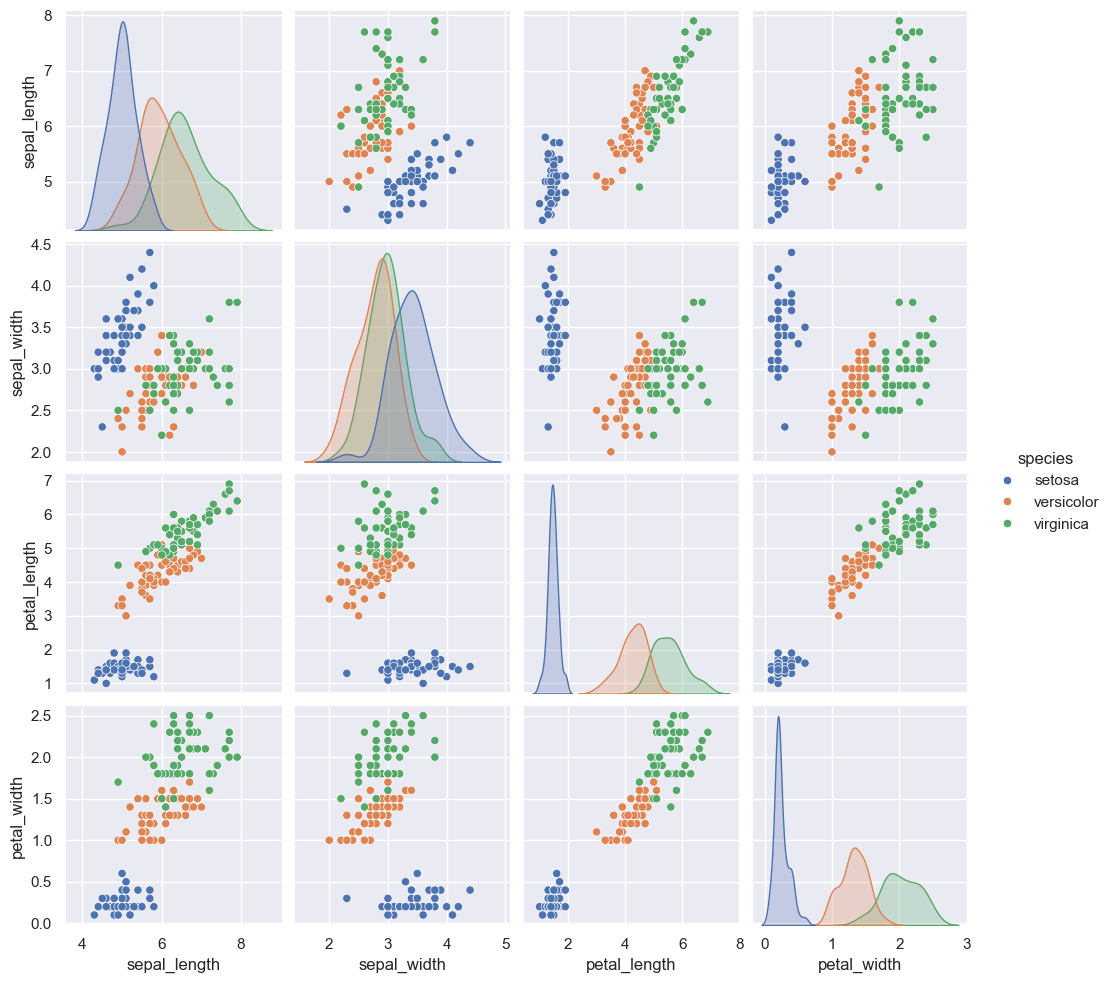

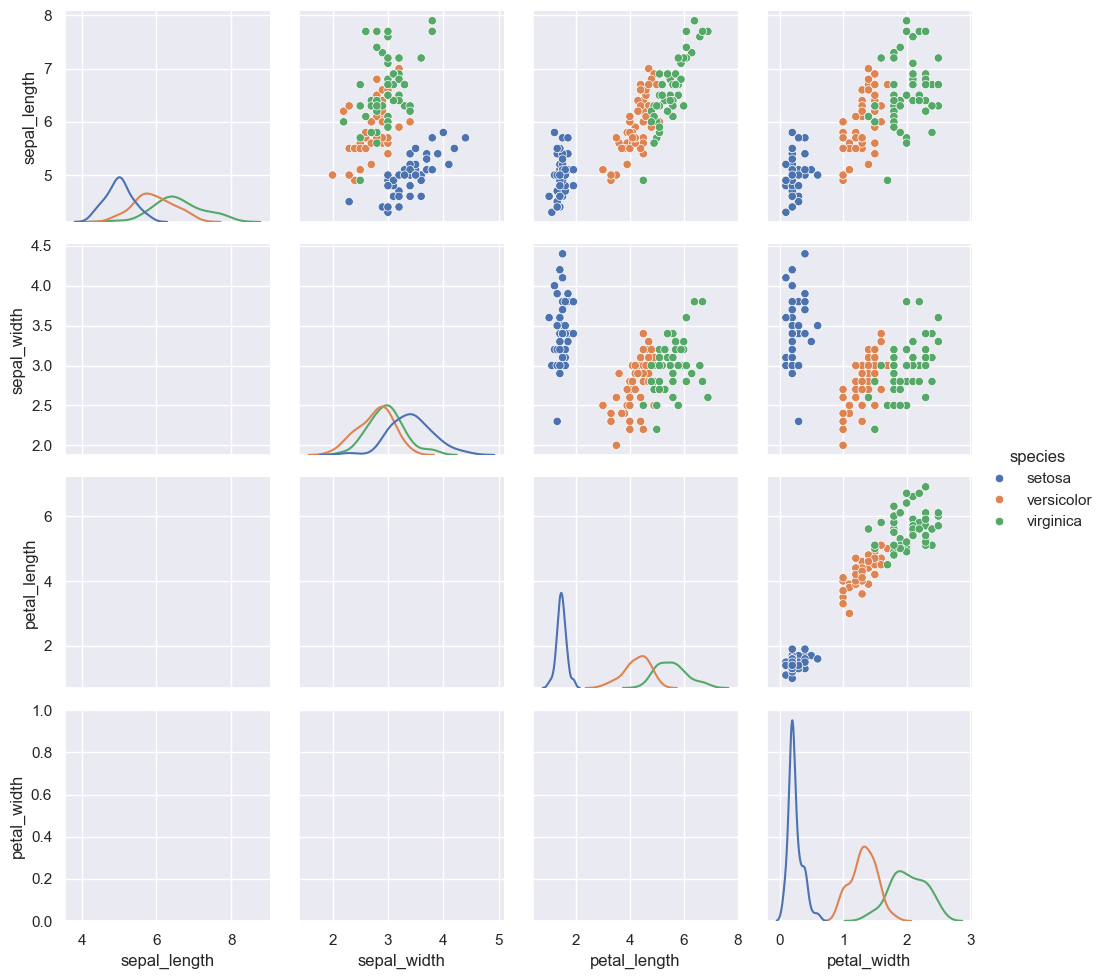

In [22]:

iris = sns.load_dataset('iris')

sns.pairplot(iris, hue='species')
plt.show()

g = sns.PairGrid(iris, hue='species')
g.map_upper(sns.scatterplot)  
g.map_diag(sns.kdeplot)    
g.add_legend()              
plt.show()

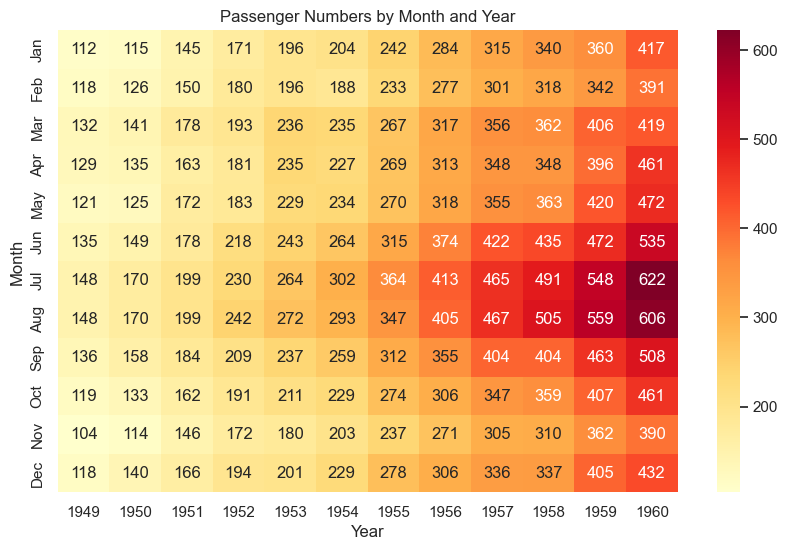

In [31]:
flights = sns.load_dataset('flights')

flights_pivot = flights.pivot(index='month', columns='year', values='passengers')

# print(flights_pivot)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flights_pivot = flights_pivot.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.heatmap(flights_pivot, annot=True, fmt='d', cmap='YlOrRd',cbar=True )

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Passenger Numbers by Month and Year')

plt.show()

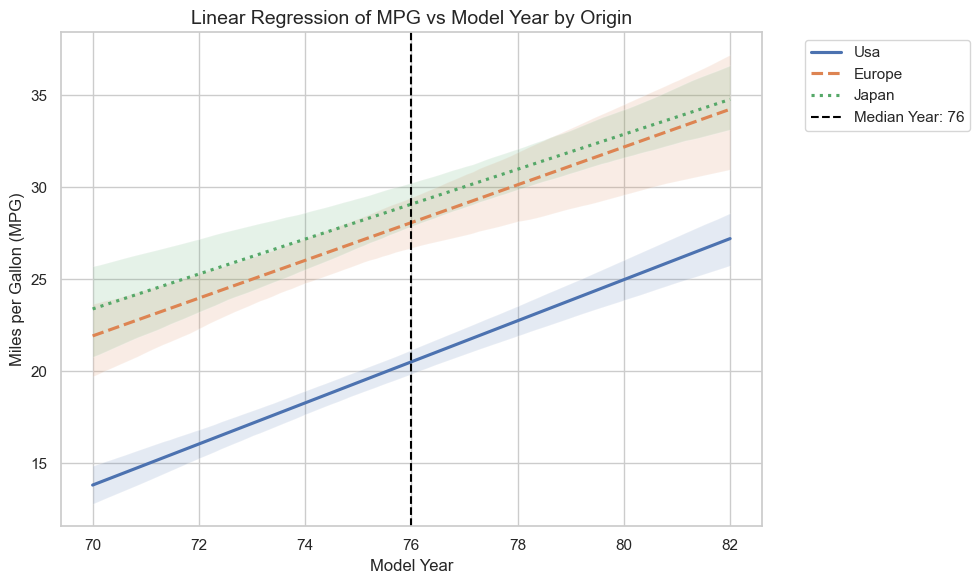

In [ ]:

mpg = sns.load_dataset("mpg").dropna(subset=["mpg", "model_year", "origin"])
median_year = int(mpg["model_year"].median())
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

line_styles = {"usa": "-", "europe": "--", "japan": ":"}
for origin, style in line_styles.items():
    sns.regplot(
        data=mpg[mpg["origin"] == origin],
        x="model_year",
        y="mpg",
        scatter=False,
        label=origin.capitalize(),
        line_kws={"linestyle": style}
    )

plt.axvline(median_year, color="black", linestyle="--", label=f"Median Year: {median_year}")
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Miles per Gallon (MPG)", fontsize=12)
plt.title("Linear Regression of MPG vs Model Year by Origin", fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()